In [1]:
# NLP
    # alpha smoothing - adding 1 to all words counts to avoid instaces of '0'
    # Stop words - 'a', 'the' .. common words are not counted
    # Run words - 'run' 'score' in sport articles
    # Bag-of-words - frequency count
    # TF-IDF - Term Frequency-Inverse Document Frequency
        # 'weightage' of common words is reduced, of non-common words is increase
        # log(total # of documents / total # of documents containing that word).. e.g. log(100/100) = 0, log (100/10)

# Naive Bayes - features are assumed to be mutually independent (simplifying assumption)
# Pipeline - https://stackoverflow.com/questions/40708077/what-is-the-difference-between-pipeline-and-make-pipeline-in-scikit

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline

### Bag-of-word approach

In [3]:
path = '../../github/python-data-science/data/'
files =['One.txt', 'Two.txt']

vocab = set()
words = []

for i, file in enumerate(files):
    with open(path+file) as f:
        words.append(f.read().lower().split())
        vocab.update(words[i])

print(vocab)
print(words)

{'popular', 'fun', 'about', 'our', 'surfing', 'this', 'furry', 'story', 'a', 'catching', 'water', 'animals', 'are', 'is', 'canine', 'waves', 'pets', 'dogs', 'sport'}
[['this', 'is', 'a', 'story', 'about', 'dogs', 'our', 'canine', 'pets', 'dogs', 'are', 'furry', 'animals'], ['this', 'story', 'is', 'about', 'surfing', 'catching', 'waves', 'is', 'fun', 'surfing', 'is', 'a', 'popular', 'water', 'sport']]


In [4]:
# Creating empty matrix
word_mat = pd.DataFrame(index=list(vocab))

for item in range(len(words)):
    word_mat[item] = 0

word_mat = word_mat.T
word_mat

,popular,fun,about,our,surfing,this,furry,story,a,catching,water,animals,are,is,canine,waves,pets,dogs,sport
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
# Counting Words
for row in range(len(words)):
    for word in words[row]:
        word_mat.at[row, word] += 1

print(word_mat.shape)
word_mat

(2, 19)


,popular,fun,about,our,surfing,this,furry,story,a,catching,water,animals,are,is,canine,waves,pets,dogs,sport
0,0,0,1,1,0,1,1,1,1,0,0,1,1,1,1,0,1,2,0
1,1,1,1,0,2,1,0,1,1,1,1,0,0,3,0,1,0,0,1


### Bag-of-words: doing it automatically with SKLEARN
* CountVectorizer() - word count matrix.. by default drops words with 1 letter, e.g. 'a', 'I'
* TfidfTransformer() - normalizes word count matrix by document ratio
* TfidfVetorizer() - does both of the above steps

In [6]:
path = '../../github/python-data-science/data/'
files =['One.txt', 'Two.txt']

docs = []

for i, file in enumerate(files):
    with open(path+file) as f:
        docs.append(f.read())
docs

['This is a story about dogs\nour canine pets\nDogs are furry animals\n',
 'This story is about surfing\nCatching waves is fun\nSurfing is a popular water sport\n']

In [7]:
cv = CountVectorizer()
matrix_sparse = cv.fit_transform(docs)
matrix_sparse

<2x18 sparse matrix of type '<class 'numpy.int64'>'
	with 22 stored elements in Compressed Sparse Row format>

In [8]:
matrix_sparse.todense()

matrix([[1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0],
        [1, 0, 0, 0, 1, 0, 1, 0, 3, 0, 0, 1, 1, 1, 2, 1, 1, 1]],
       dtype=int64)

In [9]:
matrix_df = pd.DataFrame(columns=cv.get_feature_names(), data=matrix_sparse.todense())
matrix_df

,about,animals,are,canine,catching,dogs,fun,furry,is,our,pets,popular,sport,story,surfing,this,water,waves
0,1,1,1,1,0,2,0,1,1,1,1,0,0,1,0,1,0,0
1,1,0,0,0,1,0,1,0,3,0,0,1,1,1,2,1,1,1


In [10]:
# Customizing 'Tokenizer'

vectorizer = CountVectorizer(tokenizer=lambda txt: txt.split())
X = vectorizer.fit_transform(docs)

matrix_df = pd.DataFrame(columns=vectorizer.get_feature_names(), data=X.todense())
matrix_df

,a,about,animals,are,canine,catching,dogs,fun,furry,is,our,pets,popular,sport,story,surfing,this,water,waves
0,1,1,1,1,1,0,2,0,1,1,1,1,0,0,1,0,1,0,0
1,1,1,0,0,0,1,0,1,0,3,0,0,1,1,1,2,1,1,1


In [11]:
matrix_sparse

<2x18 sparse matrix of type '<class 'numpy.int64'>'
	with 22 stored elements in Compressed Sparse Row format>

In [12]:
tfidf = TfidfTransformer()
results = tfidf.fit_transform(matrix_sparse)
results

<2x18 sparse matrix of type '<class 'numpy.float64'>'
	with 22 stored elements in Compressed Sparse Row format>

In [13]:
matrix_df = pd.DataFrame(columns=cv.get_feature_names(), data=results.todense())
matrix_df

,about,animals,are,canine,catching,dogs,fun,furry,is,our,pets,popular,sport,story,surfing,this,water,waves
0,0.205181,0.288375,0.288375,0.288375,0.000000,0.57675,0.000000,0.288375,0.205181,0.288375,0.288375,0.000000,0.000000,0.205181,0.000000,0.205181,0.000000,0.000000
1,0.177462,0.000000,0.000000,0.000000,0.249417,0.00000,0.249417,0.000000,0.532386,0.000000,0.000000,0.249417,0.249417,0.177462,0.498833,0.177462,0.249417,0.249417


In [14]:
tv = TfidfVectorizer()
tv_results = tv.fit_transform(docs)

matrix_df2 = pd.DataFrame(columns=tv.get_feature_names(), data=tv_results.todense())
matrix_df2

,about,animals,are,canine,catching,dogs,fun,furry,is,our,pets,popular,sport,story,surfing,this,water,waves
0,0.205181,0.288375,0.288375,0.288375,0.000000,0.57675,0.000000,0.288375,0.205181,0.288375,0.288375,0.000000,0.000000,0.205181,0.000000,0.205181,0.000000,0.000000
1,0.177462,0.000000,0.000000,0.000000,0.249417,0.00000,0.249417,0.000000,0.532386,0.000000,0.000000,0.249417,0.249417,0.177462,0.498833,0.177462,0.249417,0.249417


---

## Example - Airline Tweets

In [15]:
df = pd.read_csv('../../github/python-data-science/data/airline_tweets.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [16]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [17]:
df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [18]:
print(9178/(9178+3099+2363))  #63% tweets are negative

0.6269125683060109


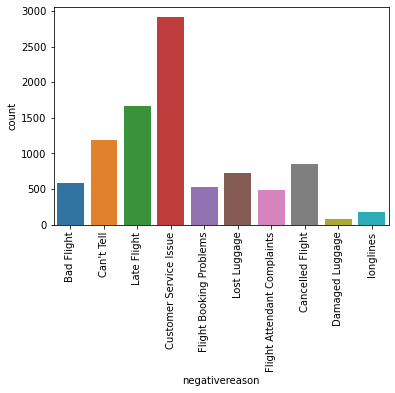

In [19]:
sns.countplot(data=df, x='negativereason')
plt.xticks(rotation=90);

In [20]:
df['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

In [21]:
df.groupby(by=['airline', 'airline_sentiment']).count()['tweet_id'].unstack()

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


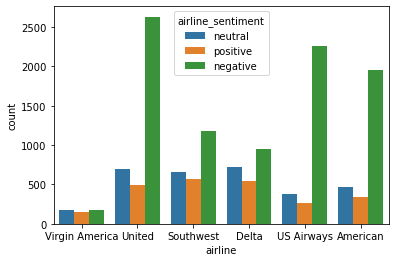

In [22]:
sns.countplot(data=df, x='airline', hue='airline_sentiment');

In [23]:
df['airline_sentiment_gold'].value_counts(dropna=False)

NaN         14600
negative       32
positive        5
neutral         3
Name: airline_sentiment_gold, dtype: int64

### Model fitting

In [24]:
import xgboost as xgb

from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC        #SVC is 'rbf' kernel by default

In [25]:
X = df['text']
y = df['airline_sentiment']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [27]:
tfidf = TfidfVectorizer(stop_words='english')
X_train_mat = tfidf.fit_transform(X_train)
X_test_mat  = tfidf.transform(X_test)

In [28]:
def run_model(model_type):
    model = model_type
    model.fit(X_train_mat, y_train)
    plot_confusion_matrix(model, X_test_mat, y_test)

#### XGBoost

C:\Users\uditg\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:53:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


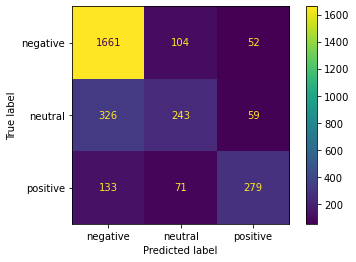

In [29]:
run_model(xgb.XGBClassifier())

#### Naive Bayes

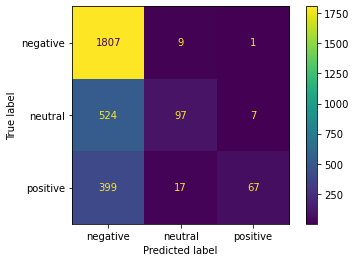

In [30]:
run_model(MultinomialNB())

#### Logistic Regression

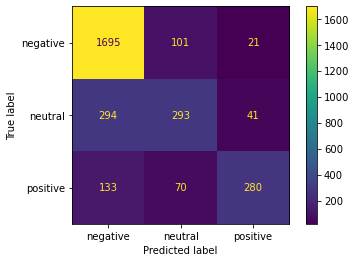

In [31]:
run_model(LogisticRegression(max_iter=10000))

#### SVC

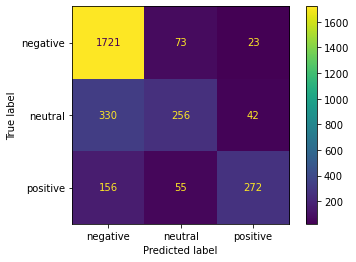

In [32]:
run_model(SVC())

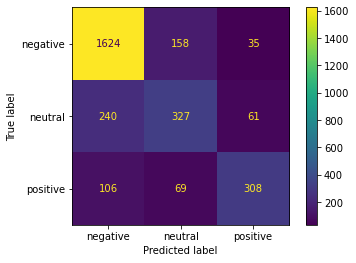

In [33]:
run_model(LinearSVC())

#### Pipeline
* https://stackoverflow.com/questions/40708077/what-is-the-difference-between-pipeline-and-make-pipeline-in-scikit

In [34]:
from sklearn.pipeline import Pipeline

In [35]:
pipe = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                 ('model', LinearSVC())])

In [36]:
pipe.fit(X, y)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('model', LinearSVC())])

In [37]:
pipe.predict(['good flight'])

array(['positive'], dtype=object)

In [38]:
pipe.predict(['bad flight'])

array(['negative'], dtype=object)

---

## Example - Movie Reviews
* http://ai.stanford.edu/~amaas/data/sentiment/

In [39]:
df = pd.read_csv('../../github/python-data-science/data/moviereviews.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   2000 non-null   object
 1   review  1965 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [40]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [41]:
df.isnull().sum()

label      0
review    35
dtype: int64

In [42]:
df['review'].str.isspace().sum()

27

In [43]:
index_to_drop = (df['review'].isnull() | df['review'].str.isspace())

In [44]:
np.sum(index_to_drop)

62

In [45]:
index_to_drop

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Name: review, Length: 2000, dtype: bool

In [46]:
df = df[~index_to_drop]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


In [47]:
df['label'].value_counts()

neg    969
pos    969
Name: label, dtype: int64

In [48]:
X = df['review']
y = df['label']

In [49]:
cv = CountVectorizer(stop_words='english')

### Top words for Neg / Pos reviews

In [50]:
res = cv.fit_transform(X[y=='neg'])
word_freq = zip(cv.get_feature_names(), res.sum(axis=0).tolist()[0])
sorted(word_freq, key= lambda x: -x[1])[:20]                          #note

[('film', 4063),
 ('movie', 3131),
 ('like', 1808),
 ('just', 1480),
 ('time', 1127),
 ('good', 1117),
 ('bad', 997),
 ('character', 926),
 ('story', 908),
 ('plot', 888),
 ('characters', 838),
 ('make', 813),
 ('really', 743),
 ('way', 734),
 ('little', 696),
 ('don', 683),
 ('does', 666),
 ('doesn', 648),
 ('action', 635),
 ('scene', 634)]

In [51]:
res = cv.fit_transform(X[y=='pos'])
word_freq = zip(cv.get_feature_names(), res.sum(axis=0).tolist()[0])
sorted(word_freq, key= lambda x: -x[1])[:20]                          #note

[('film', 5002),
 ('movie', 2389),
 ('like', 1721),
 ('just', 1273),
 ('story', 1199),
 ('good', 1193),
 ('time', 1175),
 ('character', 1037),
 ('life', 1032),
 ('characters', 957),
 ('way', 864),
 ('films', 851),
 ('does', 828),
 ('best', 788),
 ('people', 769),
 ('make', 764),
 ('little', 751),
 ('really', 731),
 ('man', 728),
 ('new', 702)]

### Modeling

In [52]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC        #SVC is 'rbf' kernel by default

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [54]:
tfidf = TfidfVectorizer(stop_words='english')
X_train_mat = tfidf.fit_transform(X_train)
X_test_mat  = tfidf.transform(X_test)

def run_model(model_type):
    model = model_type
    model.fit(X_train_mat, y_train)
    plot_confusion_matrix(model, X_test_mat, y_test)

C:\Users\uditg\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:53:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


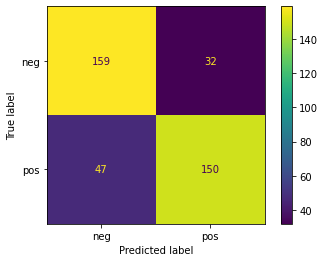

In [55]:
run_model(xgb.XGBClassifier())

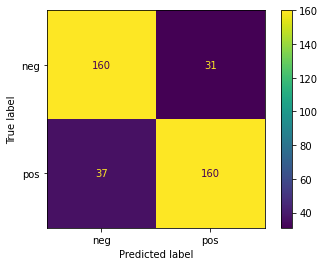

In [56]:
run_model(LinearSVC())

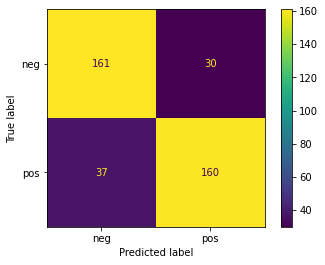

In [57]:
run_model(SVC())

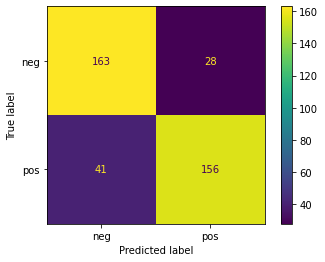

In [58]:
run_model(LogisticRegression())

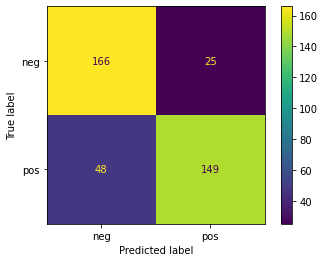

In [59]:
run_model(MultinomialNB())